## Project Goals
The primary goal of our project is to develop a machine learning model that identifies whether someone is at high risk of passing away from COVID-19 given various factors, such as age, pre-existing conditions, and symptoms. We will be using an existing dataset that has both binary and numerical features describing some COVID patients, as well as a column that describes whether or not the COVID patient passed away. Since the dataset is labeled, we will be using a supervised learning approach, with a goal of classification.

## Domain
The task, T, is the classification of mortality risk for COVID-19 patients. This will be a binary classification— 1 if the patient is likely to die from COVID-19 and 0 if the patient isn’t. The training experience, E, is the dataset of previous COVID cases that has the patients’ symptoms, demographic information, and medical history, as well as whether or not they passed away. The performance measure, P, is the percentage of patients correctly classified.

## Motivation
The motivation for this work is to identify what factors affect COVID death. The most obvious factors are age, weight, etc, but is that necessarily true with evidence from the data? We hope to investigate outlying factors that people miss when discussing COVID deaths. With over five million deaths from COVID, it is important to consider why it killed more people than all other recent virus epidemics. The main goal of this project is to build a machine learning model that, given a COVID-19 patient's current symptom, status, and medical history, will predict whether a patient is at high risk or not.

In [1]:
# Loading Libraries

import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## The Dataset

The dataset was provided by the Mexican government and is sourced from [Kaggle](https://www.kaggle.com/datasets/meirnizri/covid19-dataset). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

In [2]:
# Loading Dataset
df = pd.read_csv('../input/covid19-dataset/Covid Data.csv', low_memory=False)

### Dataset Overview

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.shape

(1048575, 21)

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
df.columns.values

array(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD',
       'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
       'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
       'CLASIFFICATION_FINAL', 'ICU'], dtype=object)

In [8]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

## Data Cleaning

### Cleaning Pregnancy Data

In [9]:
df.PREGNANT.value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

We see that all males have value 97 for pregnancy because it is missing. Given that males cannot get pregnant, we will change all 97's in `PREGNANT` to 2. Some females have 98 which is a missing value, so we change all the 98's in `PREGNANT` to NAN. Currently 1 represents True and 2 represents False. To change the boolean values to the conventional way, we change the 2's to 0's.

In [10]:
df.loc[:, 'PREGNANT'] = df.loc[:, 'PREGNANT'].replace(97, 2)
df.loc[:, 'PREGNANT'] = df.loc[:, 'PREGNANT'].replace(98, np.NAN)
df.loc[:, 'PREGNANT'] = df.loc[:, 'PREGNANT'].replace(2, 0)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,0.0,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,0.0,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,0.0,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,0.0,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,0.0,1,...,2,2,1,2,2,2,2,2,3,97


Some columns contain 3-4 unique values when it should be a boolean: YES or NO. We replace all 97's, 98's, and 99's to NAN because they are missing values. The 1's mean YES and 2's mean NO, so we change 2's to 0's, the conventional way to represent Boolean values.

In [11]:
var = df.columns[(df.nunique() == 3) | (df.nunique() == 4)].tolist()
df.loc[:, var] = df.loc[:, var].replace([97, 98, 99], np.NAN)
df.loc[:, var] = df.loc[:, var].replace(2, 0)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,NaN,1.0,65,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN
1,2,1,2,1,03/06/2020,NaN,1.0,72,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN
2,2,1,2,2,09/06/2020,1.0,0.0,55,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0
3,2,1,1,1,12/06/2020,NaN,0.0,53,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN
4,2,1,2,1,21/06/2020,NaN,0.0,68,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN


In [12]:
df.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

`DATE_DIED` is represent as a pandas date format of when the patient died. If we have `9999-99-99` values, that means this patient is alive. Since our goal is to build models that predict surival rate given a patient's characteristics, we will change the DATE_DIED to 0 if the patient is alive or 1 if the patient died.

In [13]:
df['DIED'] = np.where(df['DATE_DIED'] == '9999-99-99', 0, 1)
df.drop(columns='DATE_DIED', inplace=True)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,NaN,1.0,65,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1
1,2,1,2,1,NaN,1.0,72,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN,1
2,2,1,2,2,1.0,0.0,55,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1
3,2,1,1,1,NaN,0.0,53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,1
4,2,1,2,1,NaN,0.0,68,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1


Values between 1 and 3 in `CLASIFFICATION_FINAL` are people who have been infected with the covid virus before. Higher values indicate people who have been tested and have negative results or whose results are unknown.

In [14]:
print('Percentage of NAN values')
for col in df.columns :
    print('{:<20} => {:>10.2f}%'.format(col, df[col].isna().sum()/len(df)*100))

Percentage of NAN values
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
INTUBED              =>      81.62%
PNEUMONIA            =>       1.53%
AGE                  =>       0.00%
PREGNANT             =>       0.36%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>      81.64%
DIED                 =>       0.00%


In [15]:
df.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                  3754
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
DIED                         0
dtype: int64

Drop INTUBED and ICU due to large missing values

In [16]:
df.drop(columns=['INTUBED','ICU'], inplace=True)

## Feature Engineering

### Correlation

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
cor_data = numeric_df.corr().stack().reset_index().rename(columns={0: 'Correlation', 'level_0': 'Variable 1', 'level_1': 'Variable 2'})
cor_data['Correlation'] = cor_data['Correlation'].map('{:.2f}'.format)
cor_data['Correlation'] = pd.to_numeric(cor_data['Correlation'])

base = alt.Chart(cor_data).encode(
    x='Variable 1:O',
    y='Variable 2:O'
)

text = base.mark_text().encode(
    text='Correlation',
    color=alt.condition(
        alt.datum.correlation > 0.5,
        alt.value('white'),
        alt.value('black')
    )
)

cor_plot = base.mark_rect().encode(
    color='Correlation:Q'
)

(cor_plot + text).properties(
    width=700,
    height=400)

alt.LayerChart(...)

From the correlation matrix, we will choose only the variables that have somewhat high (> 0.05) correlation with `DIED`. In this case, the non-significant variables are `['TOBACCO', 'ASTHMA', 'INMSUPR', 'PREGNANT']`. Thus, we will drop the features that have low correlation with `DIED` feature.

In [18]:
# Determines the variables with correlation > 0.05 with Died

died_cor = cor_data[cor_data['Variable 1'] == 'DIED']
died_significant = died_cor[(died_cor['Correlation'].abs() > 0.05) | (died_cor['Correlation'] == 1)]
significant_cor = died_significant['Variable 2'].tolist()

significant_cor

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'PNEUMONIA',
 'AGE',
 'DIABETES',
 'COPD',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'CLASIFFICATION_FINAL',
 'DIED']

In [19]:
# Determines the variables with correlation <= 0.05 with Died

unsignificant_cor = list(set(df.columns.values.tolist()) - set(significant_cor))

unsignificant_cor

['INMSUPR', 'TOBACCO', 'ASTHMA', 'PREGNANT']

In [20]:
# Fitlers df so that it contains only the significant variables

df = df.filter(items=significant_cor)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,1.0,65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1
1,2,1,2,1,1.0,72,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5,1
2,2,1,2,2,0.0,55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,2,1,1,1,0.0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1
4,2,1,2,1,0.0,68,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1


Identifying sparse columns where there is only one unique value in that column. None of the columns in the dataset has only one value, so we do not remove any columns. We also cannot apply variance threshold (a simple baseline approach to feature selection - it removes all features whose variance doesn't meet some threshold) because none of the columns contain quantitative values, except age which is a variable that is highly correlated with the `DIED` variable.

In [21]:
df.columns[df.nunique() == 1]

Index([], dtype='object')

In [22]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_cols = ["MEDICAL_UNIT", "CLASIFFICATION_FINAL"]
df_categorical = encoder.fit_transform(df[categorical_cols])
categorical_names = encoder.get_feature_names_out(categorical_cols)
df_categorical = pd.DataFrame(df_categorical, columns=categorical_names)

df_categorical.head()

,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
df = df.drop(categorical_cols, axis=1)
df = df.reset_index(drop=True)
df = pd.concat([df, df_categorical], axis=1)

df.head()

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,...,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,1.0,65,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,2,1,1.0,72,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,2,2,0.0,55,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,1,1,0.0,53,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,2,1,0.0,68,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Shape before dropping columns with NAN:

In [24]:
df.shape

(1048575, 33)

Shape after dropping columns with NAN:

In [25]:
df.dropna(inplace=True)
df.shape

(1025812, 33)

### Scaling the Numeric Feature

In [26]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

In [27]:
# Determine X and Y variables

X = df.drop(columns='DIED')
Y = df.DIED

In [28]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rand_under = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rand_under.fit_resample(X,Y)

X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

print("x_resampled :", x_resampled.shape)
print("y_resampled :", y_resampled.shape)

x_resampled : (149590, 32)
y_resampled : (149590,)


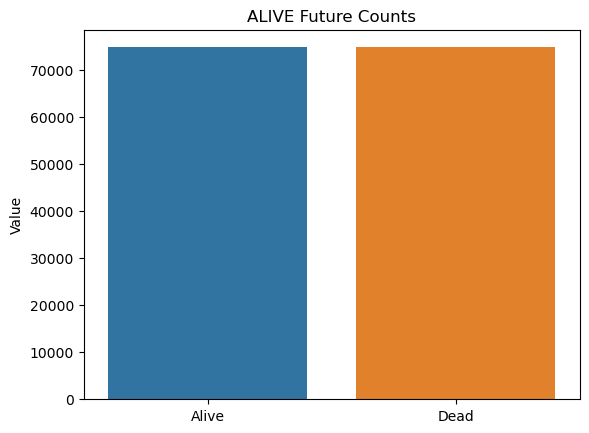

In [29]:
plt.figure()
sns.barplot(x=y_resampled.value_counts().index, y=y_resampled.value_counts().values).set(title="ALIVE Future Counts", ylabel="Value")
plt.xticks([0,1], ["Alive","Dead"])
plt.show()

## MODELING

### Helper Functions

In [30]:
from sklearn.metrics import roc_curve

# Function that draws an ROC curve
def roc(model, lbl = "Logistic Regression"):
    # Probabilities
    logreg_pred_proba = model.predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, logreg_pred_proba[:,1])
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr, tpr, label = lbl)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(lbl + " ROC Curve")
    plt.show()

In [31]:
# Function that draws a confusion matrix given a test and prediction set
def draw_matrix(y_test, y_pred):
    confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    confusion_df = confusion_df / confusion_df.sum().sum()
    confusion_df = confusion_df.reset_index().melt(id_vars=['index'], value_name='%', var_name='Predicted')
    confusion_df = confusion_df.rename(columns={'index': 'Actual'})

    heatmap = alt.Chart(confusion_df).mark_rect().encode(
        x=alt.X('Predicted:N', sort=list(confusion_df['Predicted'].unique())),
        y=alt.Y('Actual:N', sort=list(confusion_df['Actual'].unique())),
        color=alt.Color('%:Q', scale=alt.Scale(scheme='reds'))
    )
    text = heatmap.mark_text(baseline='middle').encode(
        text=alt.Text('%:Q', format='.2%'),
        color=alt.condition(
            alt.datum.Count > confusion_df['%'].max() / 2,
            alt.value('white'),
            alt.value('black')
        )
    )

    return heatmap.properties(width=300, height=300) + text

## Decision Tree

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

print("Train_x :", X_train.shape)
print("Test_x :", X_test.shape)
print("Train_y :", y_train.shape)
print("Test_y :", y_test.shape)

print(y_train.value_counts())
print(y_test.value_counts())

Train_x : (119672, 32)
Test_x : (29918, 32)
Train_y : (119672,)
Test_y : (29918,)
0    59848
1    59824
Name: DIED, dtype: int64
1    14971
0    14947
Name: DIED, dtype: int64


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Training Accuracy

In [34]:
y_pred = clf.predict(X_train)

# calculate the accuracy of the model on training data
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9574420081556254

### Testing Accuracy

In [35]:
y_pred = clf.predict(X_test)

# calculate the accuracy of the model on test data
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8764623303696771

In [36]:
f1_score(y_test, y_pred)

0.8764623303696771

In [37]:
draw_matrix(y_test, y_pred)

alt.LayerChart(...)

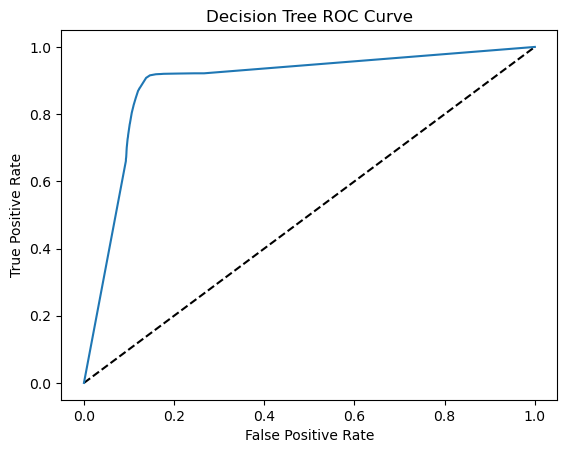

In [38]:
roc(clf, "Decision Tree")

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     14947
           1       0.88      0.88      0.88     14971

    accuracy                           0.88     29918
   macro avg       0.88      0.88      0.88     29918
weighted avg       0.88      0.88      0.88     29918



## Calculating Feature Importance

In [40]:
importance = clf.feature_importances_

for i,v in enumerate(importance):
 print('%0s - Score: %.5f' % (df.columns.values.tolist()[i],v))

importance

USMER - Score: 0.01599
SEX - Score: 0.00976
PATIENT_TYPE - Score: 0.68990
PNEUMONIA - Score: 0.06472
AGE - Score: 0.10119
DIABETES - Score: 0.01175
COPD - Score: 0.00414
HIPERTENSION - Score: 0.01350
OTHER_DISEASE - Score: 0.00518
CARDIOVASCULAR - Score: 0.00558
OBESITY - Score: 0.01269
RENAL_CHRONIC - Score: 0.00613
DIED - Score: 0.00000
MEDICAL_UNIT_1 - Score: 0.00001
MEDICAL_UNIT_2 - Score: 0.00207
MEDICAL_UNIT_3 - Score: 0.00806
MEDICAL_UNIT_4 - Score: 0.00111
MEDICAL_UNIT_5 - Score: 0.00321
MEDICAL_UNIT_6 - Score: 0.00025
MEDICAL_UNIT_7 - Score: 0.00111
MEDICAL_UNIT_8 - Score: 0.00435
MEDICAL_UNIT_9 - Score: 0.00294
MEDICAL_UNIT_10 - Score: 0.00072
MEDICAL_UNIT_11 - Score: 0.01260
MEDICAL_UNIT_12 - Score: 0.00016
MEDICAL_UNIT_13 - Score: 0.00095
CLASIFFICATION_FINAL_1 - Score: 0.00179
CLASIFFICATION_FINAL_2 - Score: 0.00474
CLASIFFICATION_FINAL_3 - Score: 0.00024
CLASIFFICATION_FINAL_4 - Score: 0.00188
CLASIFFICATION_FINAL_5 - Score: 0.00368
CLASIFFICATION_FINAL_6 - Score: 0.00960

array([1.59893619e-02, 9.75548098e-03, 6.89899446e-01, 6.47167477e-02,
       1.01189592e-01, 1.17514417e-02, 4.14412686e-03, 1.34991096e-02,
       5.17677601e-03, 5.58476617e-03, 1.26943143e-02, 6.12626146e-03,
       0.00000000e+00, 1.40681617e-05, 2.06978371e-03, 8.05557533e-03,
       1.11471715e-03, 3.21033255e-03, 2.54125446e-04, 1.10992992e-03,
       4.35346902e-03, 2.93808621e-03, 7.21768472e-04, 1.25983603e-02,
       1.64664265e-04, 9.50440836e-04, 1.78646884e-03, 4.73767544e-03,
       2.39943979e-04, 1.87651491e-03, 3.67554060e-03, 9.60110998e-03])

In [41]:
data = {'features': X.columns.values.tolist(), 'importance': clf.feature_importances_}

importance_df = pd.DataFrame(data)

importance_df
chart = alt.Chart(importance_df).mark_bar().encode(
    x='importance:Q',
    y=alt.Y('features:N', sort='-x'),
    color=alt.Color('importance:Q', scale=alt.Scale(scheme='greens')),
    tooltip=['features', 'importance'],
).properties(
    title='Feature Importances'
)

chart

alt.Chart(...)

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

### Training Accuracy

In [43]:
y_pred = clf.predict(X_train)

# calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9083829132963434

### Testing Accuracy

In [44]:
y_pred = clf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9080152416605388

In [45]:
f1_score(y_test, y_pred)

0.9105389766595149

In [46]:
draw_matrix(y_test, y_pred)

alt.LayerChart(...)

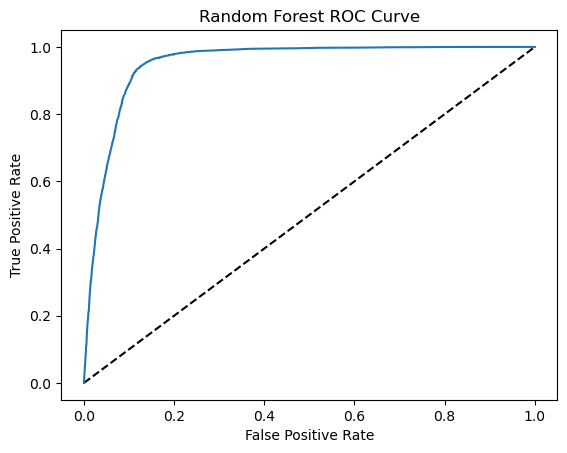

In [47]:
roc(clf, "Random Forest")

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91     14947
           1       0.89      0.94      0.91     14971

    accuracy                           0.91     29918
   macro avg       0.91      0.91      0.91     29918
weighted avg       0.91      0.91      0.91     29918



In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Training Accuracy

In [50]:
y_pred = clf.predict(X_train)

# calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9086252423290326

### Testing Accuracy

In [51]:
y_pred = clf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9090179824854603

In [52]:
f1_score(y_test, y_pred)

0.9105781865965834

In [53]:
draw_matrix(y_test, y_pred)

alt.LayerChart(...)

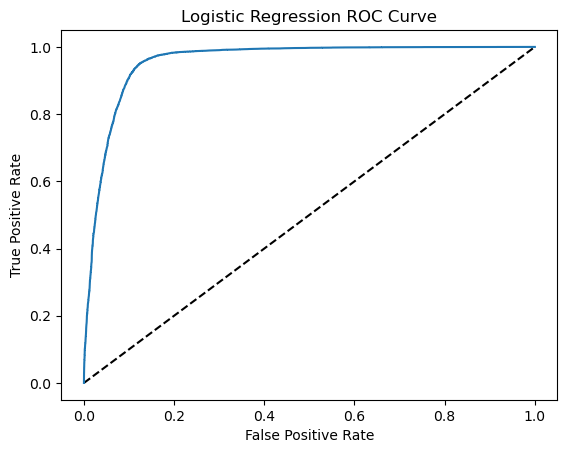

In [54]:
roc(clf)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     14947
           1       0.90      0.93      0.91     14971

    accuracy                           0.91     29918
   macro avg       0.91      0.91      0.91     29918
weighted avg       0.91      0.91      0.91     29918



## Results

1. Patient type, age, and pneumonia were the most influential features
2. Decision tree has tendencies to overfit
3. Random forest and logistic regression performed with similar accuracies

## Future Work

1. Additional Features and Datasets: 
- Explore different datasets that have more thorough intubated & ICU data
- Find datasets with additional features, such as hospital capacity, location, etc.
2. Model Tuning: Explore different hyperparameter settings for the models to optimize their performance
- Using techniques such as grid search or random search to systematically test different combinations of hyperparameters
